### Sentiment Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Please find a spreadsheet at the following [URL](https://docs.google.com/spreadsheets/d/14XrKWOEYdHNBWA1A3PqMI3ZhI0RsPbi-tD9595wnETs/edit#gid=0):

The spreadsheet contains the following information:
- Number of positive, negative and neutral messages about a certain topic (company, currency, commodity) at different days.

In [2]:
st = pd.read_csv('sentiment.csv')

In [3]:
st.head()

,Company,Day,Stock Exchange,Total Messages,Negative Messages,Neutral Messages,Positive Messages
0,Fresenius SE & Co KGaA,2018-02-04,DAX,3,0,0,3
1,Merck KGaA,2018-02-07,DAX,3,0,2,1
2,Deutsche Boerse AG,2018-02-04,DAX,4,1,0,3
3,Munich Re,2018-02-03,DAX,4,0,2,2
4,Bayer AG,2018-02-04,DAX,5,0,2,3


In [4]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 7 columns):
Company              2055 non-null object
Day                  2055 non-null object
Stock Exchange       2055 non-null object
Total Messages       2055 non-null int64
Negative Messages    2055 non-null int64
Neutral Messages     2055 non-null int64
Positive Messages    2055 non-null int64
dtypes: int64(4), object(3)
memory usage: 112.5+ KB


In [5]:
st.drop(['Stock Exchange'], axis=1, inplace=True)

- In this context, I will denote the number of messages assigned to the `Negative` and `Positive` categories as `N` and `P`, respectively, and the total number of messages in all categories as `T`.
- There is also a `Neutral` category count `O`, such that `N + P + O = T`.

There are several methods for computing an index from scored sentiment components of companies. Each is based on comparing positive and negative messages, and each has advantages and disadvantages.

__Absolute Proportional Difference__

$$Sentiment\;Score = \frac{P-N}{P+N+O}$$

- This formula measure is based on the difference in counts between `positive` and `negative` messages counts normalized by the total number of messages in the company on any topic. From this formula it it clear that each count in `P` or `N` has the same marginal effect: `1/T` or `1/(P + N + O)`.
- The `Sentiment Score` is equal to zero when there are axactly the same number of `positve` and `negative` messages, `-1` when there in only one topic on which the company in perfectly `negative` and `1` when there is one topic and the company is perfectly `positive`.

In [6]:
st['Absolute'] = (st['Positive Messages'] - st['Negative Messages'])/st['Total Messages']

In [7]:
st.head(10)

,Company,Day,Total Messages,Negative Messages,Neutral Messages,Positive Messages,Absolute
0,Fresenius SE & Co KGaA,2018-02-04,3,0,0,3,1.000000
1,Merck KGaA,2018-02-07,3,0,2,1,0.333333
2,Deutsche Boerse AG,2018-02-04,4,1,0,3,0.500000
3,Munich Re,2018-02-03,4,0,2,2,0.500000
4,Bayer AG,2018-02-04,5,0,2,3,0.600000
5,Fresenius SE & Co KGaA,2018-02-06,5,0,4,1,0.200000
6,Munich Re,2018-02-04,5,0,4,1,0.200000
7,Merck KGaA,2018-02-04,6,3,2,1,-0.333333
8,Merck KGaA,2018-02-08,6,0,3,3,0.500000
9,Bayer AG,2018-02-03,7,1,2,4,0.428571


The distribution of `Absolute Sentiment Score`

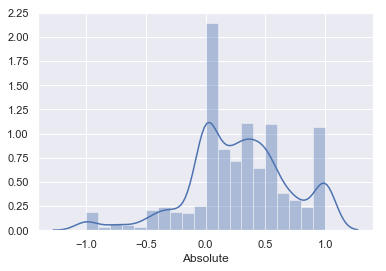

In [8]:
sns.distplot(st['Absolute'], bins=20);

- The disadvantage of this formula: a sentiment score is affected by non-sentiment (`Neutral` messages). In order to address this problem, I propose an alternative measure that _relative proportional difference_.

__Relative Proportional Difference__
$$Sentiment\;Score = \frac{P-N}{P+N}$$

- This formula also ranges from -1 to 1, but makes explict the range constrain hidden of `Absolute Proportional Difference` by non-sentiment (`Neutal` messages).
- Dividing by `P + N` the formula from variation in the sentimented messages assigns to any topic. The only remaining influence of sentimented message is that the overall number of messages available to show a sentiment is increased or reduced.
- Finally, unlike `Absolute Proportional Difference` this formula will not nesessarily create an apparent move to a more centrist position (zero) if the proportion of `Neutral` messages are dominance.

In [9]:
st['Relative'] = (st['Positive Messages'] - st['Negative Messages'])/(st['Positive Messages'] + st['Negative Messages'])

In [10]:
st.head(10)

,Company,Day,Total Messages,Negative Messages,Neutral Messages,Positive Messages,Absolute,Relative
0,Fresenius SE & Co KGaA,2018-02-04,3,0,0,3,1.000000,1.0
1,Merck KGaA,2018-02-07,3,0,2,1,0.333333,1.0
2,Deutsche Boerse AG,2018-02-04,4,1,0,3,0.500000,0.5
3,Munich Re,2018-02-03,4,0,2,2,0.500000,1.0
4,Bayer AG,2018-02-04,5,0,2,3,0.600000,1.0
5,Fresenius SE & Co KGaA,2018-02-06,5,0,4,1,0.200000,1.0
6,Munich Re,2018-02-04,5,0,4,1,0.200000,1.0
7,Merck KGaA,2018-02-04,6,3,2,1,-0.333333,-0.5
8,Merck KGaA,2018-02-08,6,0,3,3,0.500000,1.0
9,Bayer AG,2018-02-03,7,1,2,4,0.428571,0.6


In [11]:
st['Relative'].isna().sum()

313

The distribution of `Relative Proportional Difference`

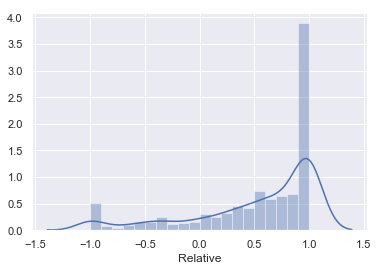

In [12]:
Relative = st['Relative'].dropna()
sns.distplot(Relative, bins=20);

- Although `Relative Proportional Difference` appears to fix the problems of messages in `Neutral` category effecting position estimates, but sill have a disadvantages. A sentiment score may tend to cluster very strongly near the scale endpoints (-1 or 1) because they may contain content primarily or exclusively of either positive or negative.

- This has the unfortunate effect of forcing the `Sentiment Score` to -1 when `P` = 0 irrespective of the value of `N`, or to 1 when `N` = 0 irrespective of the value of `P`. 

__Log Odds-Ratios (OR)__
- Because we are primarily interested in how the company more positive (or negative) a topic on particular day or between companies, we view it as most natural to consider proportional changes on a symmetrical `positive-negative` scale. The natural measure for this purpose in the empirical logit:

$$
Sentiment\;Score  = log \frac{P+0.5}{N+0.5} 
= log(P+0.5) - log(N+0.5) 
$$

- Like `Relative Proportional Difference`, `Log OR` is conditional because it only considers messages that are assigned to `positive` or `negative`. Unlike `Absolute Proportional Difference` and `Relative Proportional Difference`, however, the `Log OR` has no predefined endpoints (like [-1,1]): it is possible to generate sentiment of any level of extremity. In this respect, `Log OR` better reflects the sentiment of different companies, and also the companies that have many messages per day to companies that have few messages per day. 
- This tends to have the smoothest properties and is symmetric around zero. The 0.5 is a smoother to prevent `log(0)`.

In [13]:
st['Log OR'] = np.log(st['Positive Messages'] + 0.5) - np.log(st['Negative Messages'] + 0.5)

In [14]:
st.head(10)

,Company,Day,Total Messages,Negative Messages,Neutral Messages,Positive Messages,Absolute,Relative,Log OR
0,Fresenius SE & Co KGaA,2018-02-04,3,0,0,3,1.000000,1.0,1.945910
1,Merck KGaA,2018-02-07,3,0,2,1,0.333333,1.0,1.098612
2,Deutsche Boerse AG,2018-02-04,4,1,0,3,0.500000,0.5,0.847298
3,Munich Re,2018-02-03,4,0,2,2,0.500000,1.0,1.609438
4,Bayer AG,2018-02-04,5,0,2,3,0.600000,1.0,1.945910
5,Fresenius SE & Co KGaA,2018-02-06,5,0,4,1,0.200000,1.0,1.098612
6,Munich Re,2018-02-04,5,0,4,1,0.200000,1.0,1.098612
7,Merck KGaA,2018-02-04,6,3,2,1,-0.333333,-0.5,-0.847298
8,Merck KGaA,2018-02-08,6,0,3,3,0.500000,1.0,1.945910
9,Bayer AG,2018-02-03,7,1,2,4,0.428571,0.6,1.098612


Which company has the most negative score?

In [15]:
min(st['Log OR'])

-4.056988775678332

In [16]:
st.loc[st['Log OR'] == -4.056988775678332]

,Company,Day,Total Messages,Negative Messages,Neutral Messages,Positive Messages,Absolute,Relative,Log OR
787,GoPro,2018-02-03,150,144,4,2,-0.946667,-0.972603,-4.056989


Which company has the most positive score?

In [17]:
max(st['Log OR'])

6.1675164908883415

In [18]:
st.loc[st['Log OR'] == 6.1675164908883415]

,Company,Day,Total Messages,Negative Messages,Neutral Messages,Positive Messages,Absolute,Relative,Log OR
665,First Solar Inc,2018-02-05,312,0,74,238,0.762821,1.0,6.167516


The distribution of `Log Odds-Ratios (OR)`

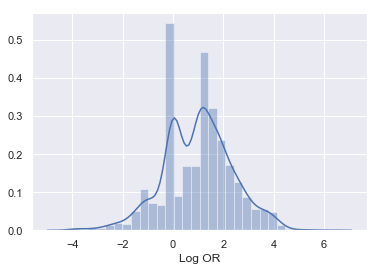

In [19]:
sns.distplot(st['Log OR'], bins=30);

My conclusions are that the use of `Logit Odds-Ratios` formula to estimate positively (or negatively) from counts of messages categories, as well as to my demonstration through direct comparison to other formula, suggest that the `Logit Odds-Ratios` is superior and should be used for calculating a sentiment score.

__Top ten companies that have most number of total messages__

In [20]:
# st['Total Messages'].groupby(st['Company']).describe().sort_values('mean', ascending=False).head(10)
st_gb = st.groupby('Company')[['Total Messages','Negative Messages','Neutral Messages','Positive Messages']].sum().sort_values(by='Total Messages', ascending=False).head(10)

In [21]:
st_gb.head()

,Total Messages,Negative Messages,Neutral Messages,Positive Messages
Company,,,,
Apple Inc,37217,7160,16075,13982
Alphabet Inc,28568,9625,11492,7451
Deutsche Bank AG,22146,9210,8625,4311
Wells Fargo & Co,21439,11462,4076,5901
Twitter Inc,20805,6759,4791,9255


In [22]:
dt = st_gb.transpose()

In [23]:
dt_bar = dt.reset_index().melt(id_vars=["index"])
dt_bar.head()

,index,Company,value
0,Total Messages,Apple Inc,37217
1,Negative Messages,Apple Inc,7160
2,Neutral Messages,Apple Inc,16075
3,Positive Messages,Apple Inc,13982
4,Total Messages,Alphabet Inc,28568


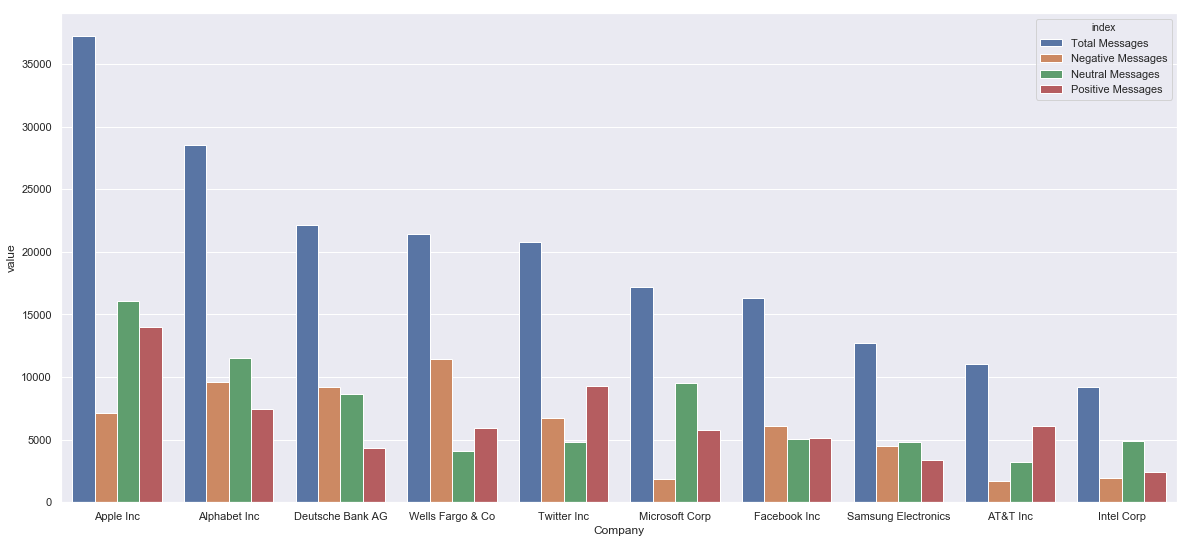

In [24]:
plt.figure(figsize=(20,9))
sns.barplot(x="Company", y="value", hue="index", data=dt_bar);